In [1]:
#Load the common functions and imports
%run functions.py

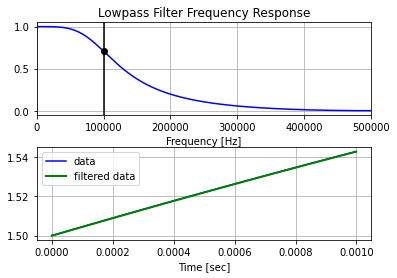

In [4]:
cutoff = 100e3
fs = 1000e3
order = 2
# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, fs=fs, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(w, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 1000/fs         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

Best shifting is by shifting about -1
Best shifting is by shifting about 0
Best shifting is by shifting about 0
Best shifting is by shifting about 50
Best shifting is by shifting about -1
Best shifting is by shifting about -1
Best shifting is by shifting about 0
Best shifting is by shifting about 0
Best shifting is by shifting about 0


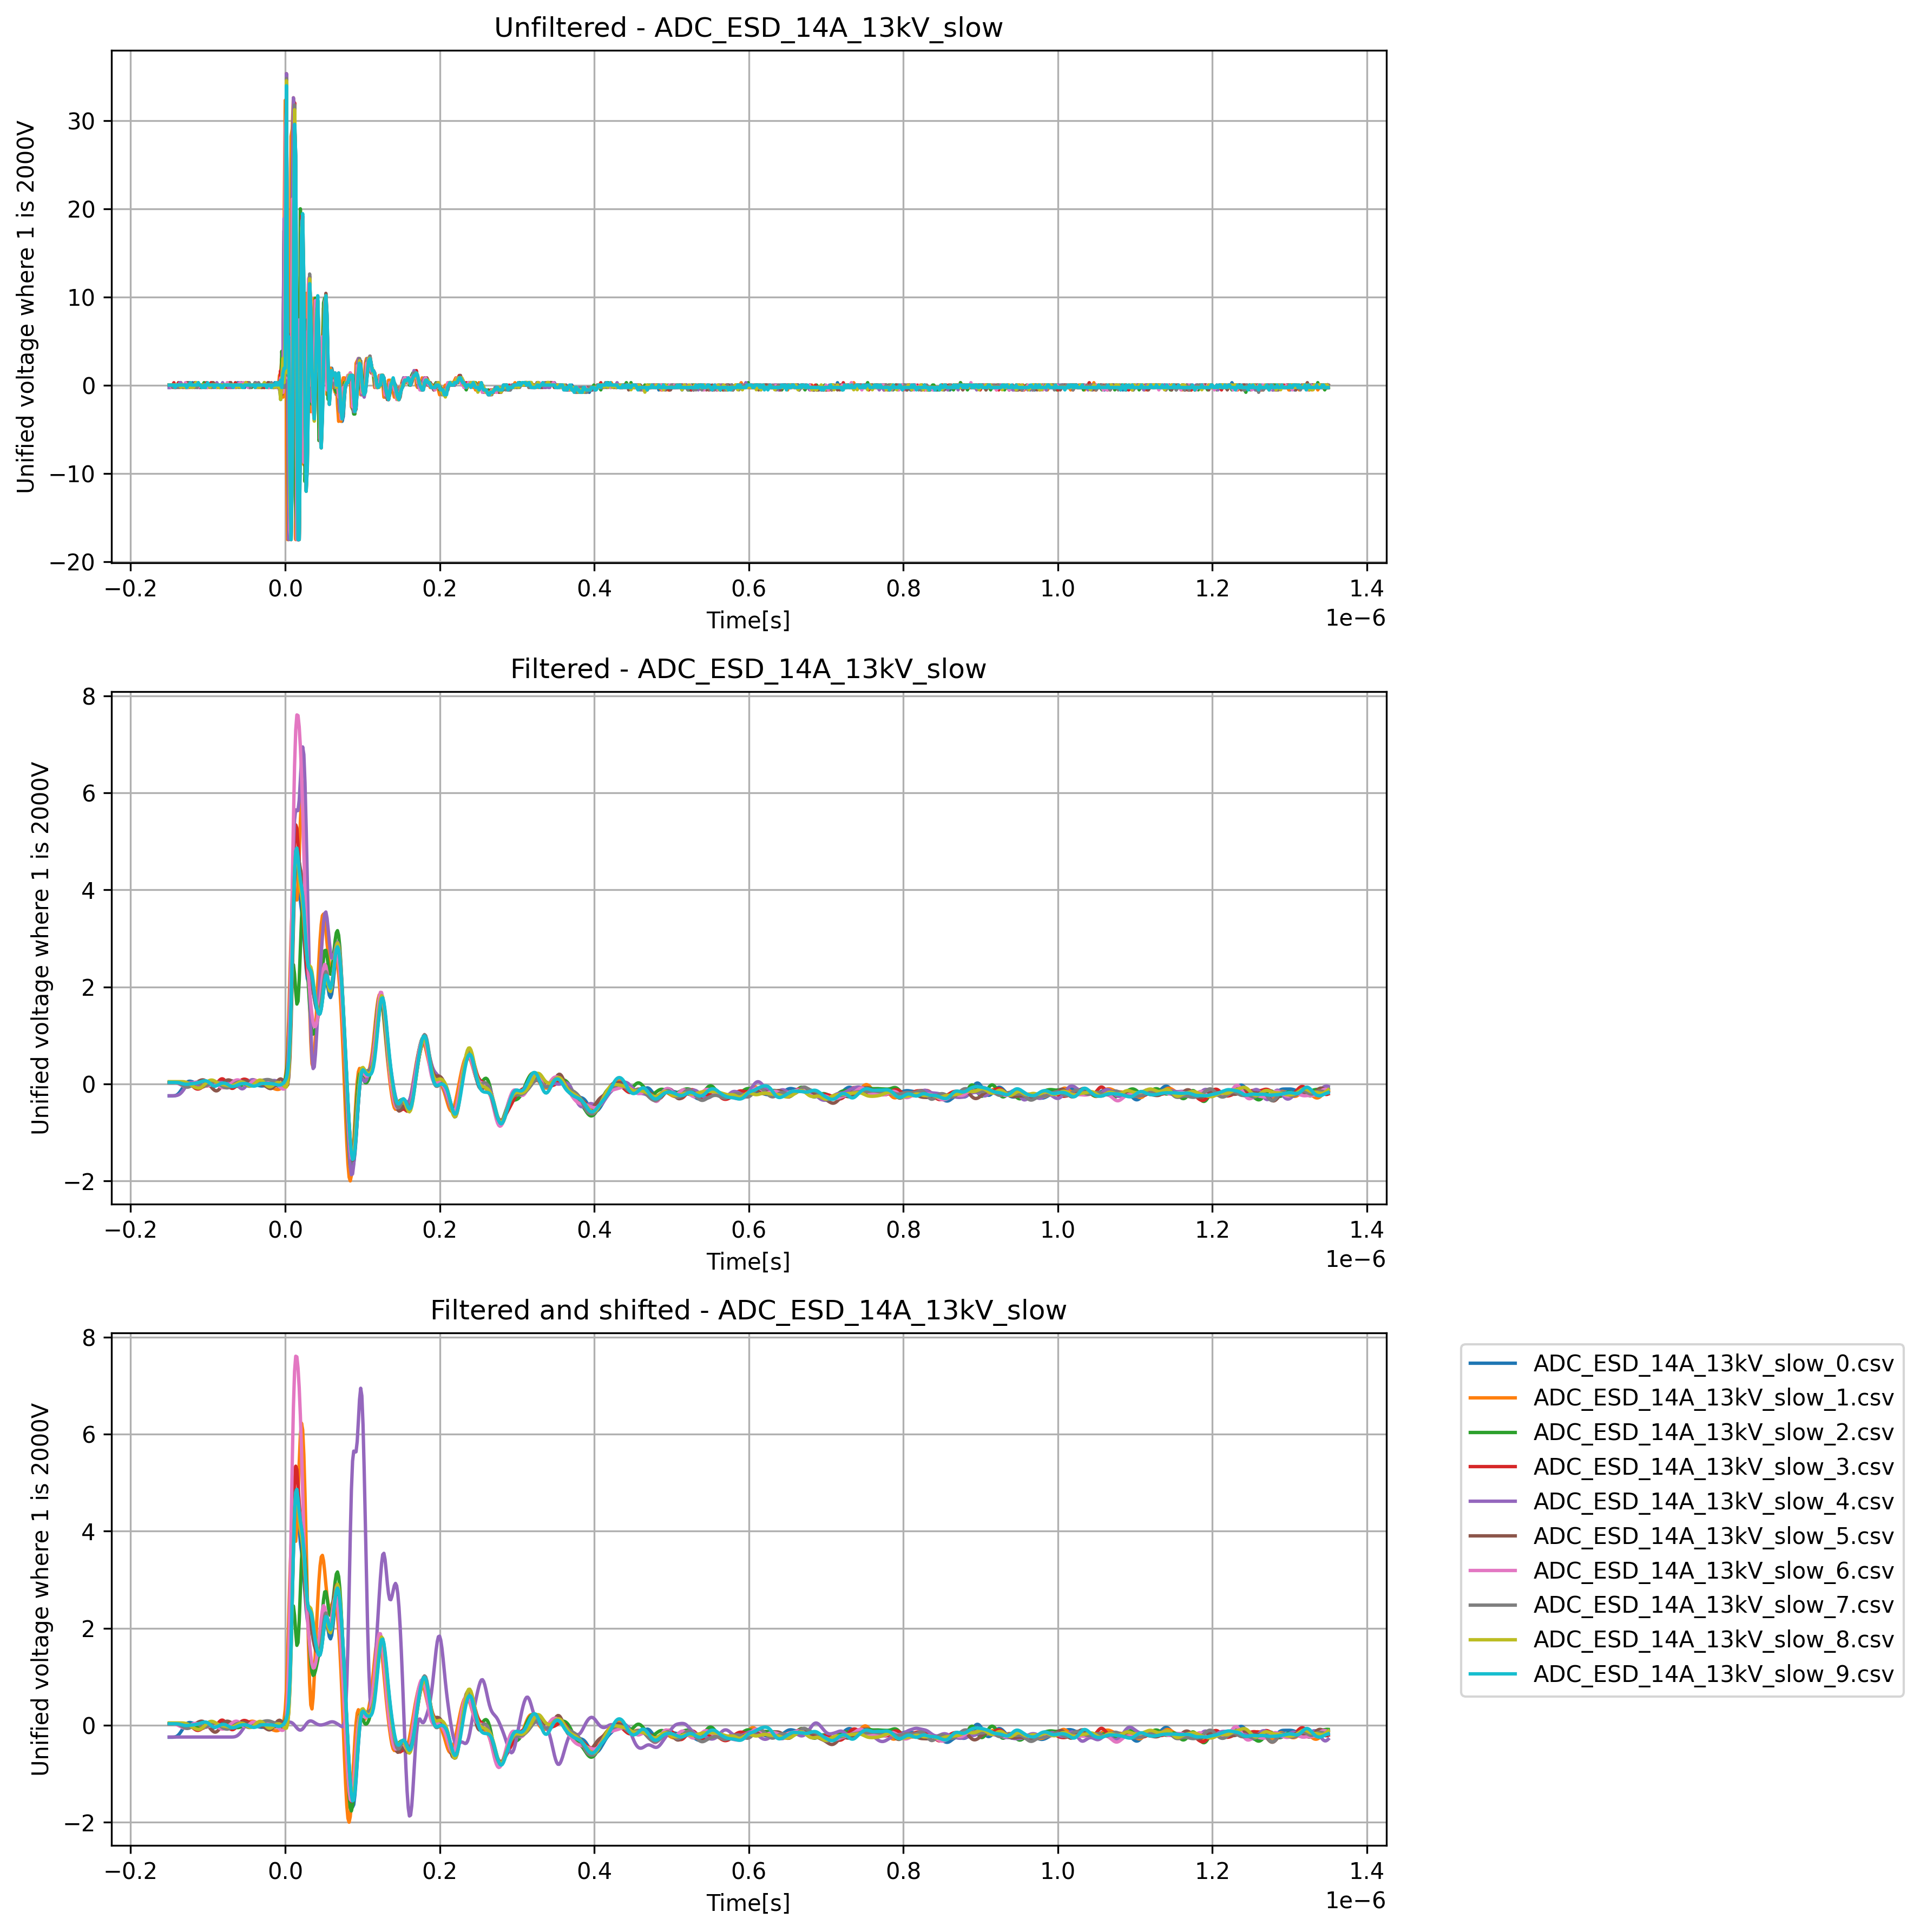

In [5]:

PATH = './CSVs' # Use your path
fileNames = os.listdir(PATH)
plt.figure(figsize=(12, 12), dpi=300)



fileName = 'ADC_ESD_14A_13kV_slow'
maxVoltage = 2000
preample = open_dictionary(fileName)

### Filter file name list for files ending with .csv
if "slow" in fileName:
    fileNames = [file for file in fileNames if '.csv' and fileName in file]
else:
    fileNames = [file for file in fileNames if '.csv' and fileName in file and "slow" not in file]

timedata = np.linspace(preample['xorigin'], preample['xincrement']*preample['points']+preample['xorigin'], num=preample['points'])

divisionFactor = 1/(33000/(33000 + 5000000))

# Filter requirements.
order = 5
#fs = 100e6      # sample rate, Hz
fs = 1/preample['xincrement']
cutoff = 40e6  # desired cutoff frequency of the filter, Hz

#Better to shift after data has been low pass filtered it seems
#targetData = butter_lowpass_filter(unifyData(getCSV('CSVs/'+fileNames[0]), maxVoltage, divisionFactor), cutoff, fs, order)
targetData = butter_lowpass_filter(startAtZero(getCSV('CSVs/'+fileNames[0])), cutoff, fs, order)

for file in fileNames:
    #data = unifyData(getCSV('CSVs/'+file), maxVoltage, divisionFactor)
    data = startAtZero(getCSV('CSVs/'+file))
    plt.subplot(3, 1, 1)
    plt.plot(timedata, data, label=str(file))
    plt.subplot(3, 1, 2)
    #plt.plot(timedata, butter_lowpass_filter(data, cutoff, fs, order), label=str(file))
    plt.plot(timedata, butter_lowpass_filter(data, cutoff, fs, order), label=str(file))
    plt.subplot(3, 1, 3)
    tempb = butter_lowpass_filter(data, cutoff, fs, order)
    plt.plot(timedata, shiftData(targetData, tempb, nToUse = 150), label=str(file))
    #plt.plot(testeryes(data), label=str(file))

plt.subplot(3, 1, 1)
plt.title("Unfiltered - " + fileName)
plt.grid()
plt.xlabel('Time[s]')
plt.ylabel('Unified voltage where 1 is %dV' %(maxVoltage))
plt.subplot(3, 1, 2)
plt.title("Filtered - " + fileName)
plt.grid()
plt.xlabel('Time[s]')
plt.ylabel('Unified voltage where 1 is %dV' %(maxVoltage))
plt.subplot(3, 1, 3)
plt.title("Filtered and shifted - " + fileName)
plt.grid()
plt.xlabel('Time[s]')
plt.ylabel('Unified voltage where 1 is %dV' %(maxVoltage))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
#plt.savefig("OverleafImages/FilteredAndAirgapSlow", bbox_inches='tight', dpi=300)
plt.show()

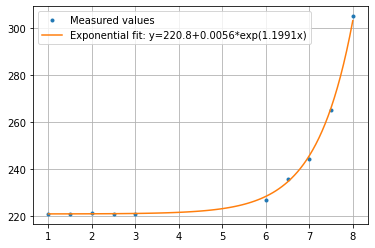

In [6]:
tempDataX = [1, 1.5, 2, 2.5, 3, 6,6.5,7,7.5,8]
tempDataY = [220.8,220.8,221.1,220.9,220.9,226.9,235.5,244.2,265,304.9]
tempDataYshift = [x-220.79 for x in tempDataY]

fit = np.polyfit(tempDataX,np.log(tempDataYshift),1, w=np.sqrt(tempDataYshift))
line = np.poly1d(fit)
xp = np.linspace(1,8,100)
plt.plot(tempDataX,tempDataY,".",label="Measured values")
#plt.plot(xp, line(xp), "-")
ypshift = np.exp(fit[1])*np.exp(fit[0]*xp)
yp = [x+220.79 for x in ypshift]
plt.plot(xp, yp, label="Exponential fit: y=220.8+" + str(np.exp(fit[1]))[:6] + "*exp(" + str(fit[0])[:6] + "x)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
N = preample['points']
T = preample['xincrement']
yf = fft(data)
yf2 = fft(tempb)

xf = fftfreq(N, T)
plt.figure(figsize=(12, 12), dpi=300)

plt.plot(xf[:500], 2.0/N * np.abs(yf[:500]))
plt.plot(xf[:500], 2.0/N * np.abs(yf2[:500]))
plt.grid()
plt.xlim(0,0.8e9)
#plt.ylim(0,0.5)
plt.show()

In [ ]:
data1 = getCSV('CSVs/ADC_ESD_6_1k5V_RAD_1.csv') 
preample = open_dictionary('ADC_ESD_6_1k5V_RAD_1')
data2 = getCSV('CSVs/ADC_ESD_6_1k5V_RAD_Connect.csv') 

OSC_plot_waveform([a_i - b_i for a_i, b_i in zip(data2, data1)], preample, printName = temp_filename , printFlag = False)
OSC_plot_waveform(data2, preample, printName = temp_filename , printFlag = False)

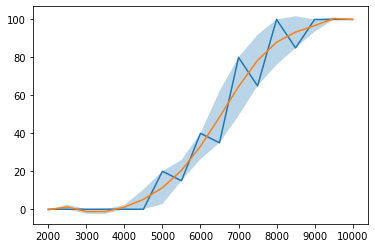

In [8]:
gapsize = "0.5mm"
voltPerc = {2000:0,
            2500:0,
            3000:0,
            3500:0,
            4000:0,
            4500:0,
            5000:20,
            5500:15,
            6000:40,
            6500:35,
            7000:80,
            7500:65,
            8000:100,
            8500:85,
            9000:100,
            9500:100,
            10000:100}
x = list(voltPerc.keys())
y = list(voltPerc.values())
p = np.polyfit(x,y, 8)
plt.plot(x,y)
yfit = np.polyval(p,x)
plt.plot(x, yfit)
error = abs(y-yfit)
plt.fill_between(x, yfit-error, yfit+error,alpha=0.3)

plt.show()